# Salary Forecast

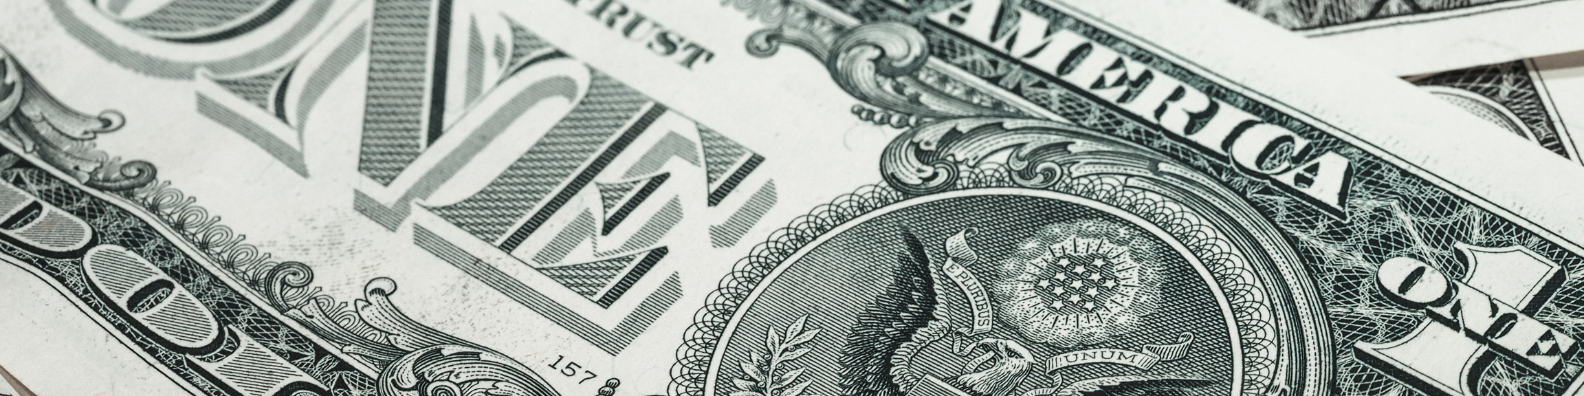

## Problem Statement

El objetivo de este proyecto es el desarrollo, y posterior despliegue en forma de aplicación web, mediante Streamlit, de un modelo de Machine Learning que prediga el salario de los empleados en base a las siguientes variables: rango de edad, años de experiencia, industria en la que trabajan, nivel educativo, localización, modalidad de trabajo y género.

## Data Collection

Para desarrollar este proyecto se ha empleado una base de datos procedente de **Kaggle**, que incluye información relativa a los salarios de 32.570 usuarios de LinkedIn.

Mención a Ricardo A. Ugas, Product Manager de Honeywell, por compartir esta base de datos:<br> https://www.kaggle.com/datasets/ricardoaugas/salary-transparency-dataset-2022

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=None

plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-v0_8-whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Data Reading

In [2]:
df = pd.read_csv(r'datasets/Salary_Data_2022_REV15.csv')
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

This dataset has 32570 rows and 24 columns


,ID,Timestamp,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Location,Country,Salary,Annual.Bonus,Annual.Average.of.RSUs,Signing.Bonus,Currency,Maternity.Paternity.Months,Sick.Days,Office.Days,Open.To.Discuss.Salary,How.many.months.Maternity.or.Paternity.does.your.company.offer.,Gender,X,Diverse.Identity..Optional.,Description
0,1,12/8/2021 3:05,18-21,3.0,GAMING,STREAMER,TWITCH,None,LOS ANGELES CA,US,490000,0.0,0.0,0.0,USD,NaN,NaN,NaN,No,as much as i want,Male,NaN,NaN,TWITCH
1,2,12/9/2021 15:49,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,WINNIPEG,CANADA,490000,0.0,0.0,0.0,CAD,NaN,NaN,5.0,Yes,NaN,Male,NaN,NaN,AESTHETIC CLINIC
2,3,12/8/2021 2:16,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,SAN DIEGO,US,480000,0.0,0.0,0.0,USD,NaN,7.0,NaN,Yes,NaN,Male,NaN,NaN,RUST CLASH
3,4,12/8/2021 5:15,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,"TAMPA, FL",US,480000,0.0,150000.0,0.0,USD,NaN,NaN,NaN,Yes,Not sure,Male,NaN,NaN,REDACTED
4,5,12/8/2021 14:16,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,"CHARLOTTE, NC",US,480000,0.0,0.0,0.0,USD,NaN,NaN,3.0,No,None,Female,NaN,NaN,CAROLINA BLIND CRAFTERS


## Data Wrangling

In [3]:
df = df.query('Currency == "USD" & Country == "US"')

df = df[['Age.Range', 'Years.of.Experience', 'Industry', 'Education',
         'Location', 'Salary','Office.Days', 'Gender']]

df = df.rename(columns={'Age.Range': 'AgeRange', 'Years.of.Experience': 'YearsExperience',
                        'Office.Days': 'Modality'})

df.head()

,AgeRange,YearsExperience,Industry,Education,Location,Salary,Modality,Gender
0,18-21,3.0,GAMING,None,LOS ANGELES CA,490000,NaN,Male
2,18-21,1.0,ONLINE ARCADE,High School/GED,SAN DIEGO,480000,NaN,Male
3,18-21,2.0,CRYPTO,Some College,"TAMPA, FL",480000,NaN,Male
4,34-37,13.0,WINDOW COVERINGS,Bachelor's Degree,"CHARLOTTE, NC",480000,3.0,Female
6,22-25,3.0,CONTENT MARKETING,Some College,OSLO,480000,5.0,Male


## Outlier / Missing Values Treatment and Feature Engineering

In [4]:
df['Modality'] = df['Modality'].fillna(0)

df['Modality'] = df['Modality'].replace([5, 6, 7], 'Onsite')
df['Modality'] = df['Modality'].replace([1, 2, 3, 4], 'Hybrid')
df['Modality'] = df['Modality'].replace([0], 'Remote')

df['AgeRange'] = df['AgeRange'].replace(['46-49', '50-53', '54-57', '58+'], '46+')

df['SalaryLongitude'] = df['Salary'].apply(lambda x: len(str(x)))

df = df.query('SalaryLongitude >= 5').drop(columns=['SalaryLongitude'])

df.loc[df['Industry'] == 'PR', 'Industry'] = 'PUBLIC RELATIONS'
df.loc[df['Industry'] == 'HR', 'Industry'] = 'HUMAN RESOURCES'

df.loc[(df['Location'] == 'NY') | (df['Location'] == 'NY, NY'), 'Location'] = 'NEW YORK, NY'
df.loc[df['Location'] == 'LA', 'Location'] = 'LOS ANGELES, CA'
df.loc[df['Location'] == 'DC', 'Location'] = 'WASHINGTON, DC'

df = df.dropna()

df.loc[df['Industry'].str.contains('HEALTH'), 'Industry'] = 'HEALTHCARE'
df.loc[(df['Industry'].str.contains('GAMING')) | (df['Industry'].str.contains('GAME')), 'Industry'] = 'GAMING'
df.loc[df['Industry'].str.contains('EDUCATION'), 'Industry'] = 'EDUCATION'
df.loc[df['Industry'].str.contains('RETAIL'), 'Industry'] = 'RETAIL'
df.loc[df['Industry'].str.contains('MARKETING'), 'Industry'] = 'MARKETING'
df.loc[df['Industry'].str.contains('PHARMA'), 'Industry'] = 'PHARMACY'
df.loc[df['Industry'].str.contains('CONSULTING'), 'Industry'] = 'CONSULTING'
df.loc[(df['Industry'].str.contains('FINANCE')) | (df['Industry'].str.contains('FINANCIAL')), 'Industry'] = 'FINANCE'
df.loc[df['Industry'].str.contains('AGRICULTURE'), 'Industry'] = 'AGRICULTURE'
df.loc[df['Industry'].str.contains('DELIVERY'), 'Industry'] = 'DELIVERY'
df.loc[df['Industry'].str.contains('SALES'), 'Industry'] = 'SALES'
df.loc[df['Industry'].str.contains('ACCOUNTING'), 'Industry'] = 'ACCOUNTING'
df.loc[df['Industry'].str.contains('ARCHTECHECTURE'), 'Industry'] = 'ARCHTECHECTURE'
df.loc[df['Industry'].str.contains('ENTERTAINMENT'), 'Industry'] = 'ENTERTAINMENT'
df.loc[(df['Industry'].str.contains('LEGAL')) | (df['Industry'].str.contains('LAW')), 'Industry'] = 'LEGAL'
df.loc[df['Industry'].str.contains('E-COMMERCE'), 'Industry'] = 'E-COMMERCE'
df.loc[df['Industry'].str.contains('BANKING'), 'Industry'] = 'BANKING'
df.loc[df['Industry'].str.contains('ACADEMIA'), 'Industry'] = 'ACADEMIA'
df.loc[df['Industry'].str.contains('GRAPHIC DESIGN'), 'Industry'] = 'GRAPHIC DESIGN'
df.loc[df['Industry'].str.contains('INSURANCE'), 'Industry'] = 'INSURANCE'
df.loc[df['Industry'].str.contains('GOVERNMENT'), 'Industry'] = 'GOVERNMENT'
df.loc[df['Industry'].str.contains('MEDIA'), 'Industry'] = 'MEDIA'
df.loc[df['Industry'].str.contains('STAFFING'), 'Industry'] = 'STAFFING'
df.loc[df['Industry'].str.contains('DEFENSE'), 'Industry'] = 'DEFENSE'
df.loc[df['Industry'].str.contains('FASHION'), 'Industry'] = 'FASHION'
df.loc[df['Industry'].str.contains('MEDICAL'), 'Industry'] = 'MEDICAL'
df.loc[df['Industry'].str.contains('LOGISTICS'), 'Industry'] = 'LOGISTICS'
df.loc[df['Industry'].str.contains('AUTO'), 'Industry'] = 'AUTOMOTIVE'
df.loc[df['Industry'].str.contains('TRANSPORTATION'), 'Industry'] = 'TRANSPORTATION'
df.loc[df['Industry'].str.contains('BIOTECH'), 'Industry'] = 'BIOTECH'
df.loc[df['Industry'].str.contains('ADVERTISING'), 'Industry'] = 'ADVERTISING'
df.loc[df['Industry'].str.contains('MANUFACTURING'), 'Industry'] = 'MANUFACTURING'
df.loc[df['Industry'].str.contains('ENGINEERING'), 'Industry'] = 'ENGINEERING'
df.loc[df['Industry'].str.contains('HOSPTECHALTECHY'), 'Industry'] = 'HOSPTECHALTECHY'
df.loc[df['Industry'].str.contains('HUMAN RESOURCES'), 'Industry'] = 'HUMAN RESOURCES'
df.loc[df['Industry'].str.contains('ADMINISTRATION'), 'Industry'] = 'ADMINISTRATION'
df.loc[df['Industry'].str.contains('FOOD'), 'Industry'] = 'FOOD'
df.loc[df['Industry'].str.contains('REAL ESTATE'), 'Industry'] = 'REAL ESTATE'
df.loc[df['Industry'].str.contains('CYBER'), 'Industry'] = 'CYBERSECURITY'
df.loc[df['Industry'].str.contains('DENTAL'), 'Industry'] = 'DENTAL'
df.loc[df['Industry'].str.contains('CONSUMER'), 'Industry'] = 'CONSUMER GOODS'
df.loc[(df['Industry'].str.contains('OIL')) | (df['Industry'].str.contains('GAS')), 'Industry'] = 'OIL AND GAS'
df.loc[df['Industry'].str.contains('TELEC'), 'Industry'] = 'TELECOMMUNICATIONS'

df.loc[df['Location'].str.contains('NEW YORK'), 'Location'] = 'NEW YORK, NY'
df.loc[df['Location'].str.contains('NYC'), 'Location'] = 'NEW YORK, NY'
df.loc[df['Location'].str.startswith('LOS'), 'Location'] = 'LOS ANGELES, CA'
df.loc[df['Location'].str.contains('PHILADELPHIA'), 'Location'] = 'PHILADELPHIA, PA'
df.loc[df['Location'].str.contains('CHICAGO'), 'Location'] = 'CHICAGO, IL'
df.loc[df['Location'].str.contains('BOSTON'), 'Location'] = 'BOSTON, MA'
df.loc[df['Location'].str.contains('SEATTLE'), 'Location'] = 'SEATTLE, WA'
df.loc[df['Location'].str.contains('DALLAS'), 'Location'] = 'DALLAS, TX'
df.loc[df['Location'].str.contains('SAN FRANCISCO'), 'Location'] = 'SAN FRANCISCO, CA'
df.loc[df['Location'].str.contains('AUSTIN'), 'Location'] = 'AUSTIN, TX'
df.loc[df['Location'].str.contains('ATLANTA'), 'Location'] = 'ATLANTA, GA'
df.loc[df['Location'].str.contains('MIAMI'), 'Location'] = 'MIAMI, FL'
df.loc[df['Location'].str.contains('DENVER'), 'Location'] = 'DENVER, CO'
df.loc[df['Location'].str.contains('WASHINGTON'), 'Location'] = 'WASHINGTON, DC'
df.loc[df['Location'].str.contains('MINNEAPOLIS'), 'Location'] = 'MINNEAPOLIS, MN'
df.loc[df['Location'].str.contains('HOUSTON'), 'Location'] = 'HOUSTON, TX'
df.loc[df['Location'].str.contains('DETROIT'), 'Location'] = 'DETROIT, MI'
df.loc[df['Location'].str.contains('SAN DIEGO'), 'Location'] = 'SAN DIEGO, CA'
df.loc[df['Location'].str.contains('PHOENIX'), 'Location'] = 'PHOENIX, AZ'
df.loc[df['Location'].str.contains('CHARLOTTE'), 'Location'] = 'CHARLOTTE, NC'
df.loc[df['Location'].str.contains('NASHVILLE'), 'Location'] = 'NASHVILLE, TN'
df.loc[df['Location'].str.contains('PORTLAND'), 'Location'] = 'PORTLAND, OR'
df.loc[df['Location'].str.contains('RALEIGH'), 'Location'] = 'RALEIGH, NC'
df.loc[df['Location'].str.contains('ORLANDO'), 'Location'] = 'ORLANDO, FL'
df.loc[df['Location'].str.contains('TAMPA'), 'Location'] = 'TAMPA, FL'
df.loc[df['Location'].str.contains('COLUMBUS'), 'Location'] = 'COLUMBUS, OH'
df.loc[df['Location'].str.contains('PITTSBURGH'), 'Location'] = 'PITTSBURGH, PA'
df.loc[df['Location'].str.contains('INDIANAPOLIS'), 'Location'] = 'INDIANAPOLIS, IN'
df.loc[df['Location'].str.contains('SALT LAKE'), 'Location'] = 'SALT LAKE CITY, UT'
df.loc[df['Location'].str.startswith('SAN JOS'), 'Location'] = 'SAN JOSE, CA'
df.loc[df['Location'].str.contains('BALTIMORE'), 'Location'] = 'BALTIMORE, MD'
df.loc[df['Location'].str.contains('CINCINNATI'), 'Location'] = 'CINCINNATI, OH'
df.loc[df['Location'].str.contains('SACRAMENTO'), 'Location'] = 'SACRAMENTO, CA'
df.loc[(df['Location'].str.startswith('KANSAS')) & (df['Location'].str.endswith('MO')), 'Location'] = 'KANSAS CITY, MO'
df.loc[df['Location'].str.startswith('ST. L'), 'Location'] = 'ST. LOUIS, MO'
df.loc[df['Location'].str.contains('CLEVELAND'), 'Location'] = 'CLEVELAND, OH'
df.loc[df['Location'].str.contains('MADISON'), 'Location'] = 'MADISON, WI'
df.loc[df['Location'].str.contains('RICHMOND'), 'Location'] = 'RICHMOND, VA'
df.loc[df['Location'].str.contains('IRVINE'), 'Location'] = 'IRVINE, CA'
df.loc[df['Location'].str.contains('SAN ANTONIO'), 'Location'] = 'SAN ANTONIO, TX'
df.loc[df['Location'].str.contains('HARTFORD'), 'Location'] = 'HARTFORD, CT'
df.loc[df['Location'].str.contains('LAS VEGAS'), 'Location'] = 'LAS VEGAS, NV'
df.loc[df['Location'].str.contains('JACKSONVILLE'), 'Location'] = 'JACKSONVILLE, FL'

df = df.query('Salary != 0').reset_index(drop=True)

df['Industry'] = df['Industry'].str.title()
df['Location'] = df['Location'].str[:-2].str.title() + df['Location'].str[-2:]

df['YearsExperience'] = df['YearsExperience'].astype(int)

df.head()

,AgeRange,YearsExperience,Industry,Education,Location,Salary,Modality,Gender
0,18-21,3,Gaming,None,"Los Angeles, CA",490000,Remote,Male
1,18-21,1,Online Arcade,High School/GED,"San Diego, CA",480000,Remote,Male
2,18-21,2,Crypto,Some College,"Tampa, FL",480000,Remote,Male
3,34-37,13,Window Coverings,Bachelor's Degree,"Charlotte, NC",480000,Hybrid,Female
4,22-25,3,Marketing,Some College,OsLO,480000,Onsite,Male


## Categorical Feature Encoding

In [5]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [6]:
location_map = shorten_categories(df['Location'].value_counts(), 100)
df['Location'] = df['Location'].map(location_map)

industry_map = shorten_categories(df['Industry'].value_counts(), 100)
df['Industry'] = df['Industry'].map(industry_map)

df = df.query('Industry != "Other" & Location != "Other"').reset_index(drop=True)

print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns')

df.head()

This dataset has 16158 rows and 8 columns


,AgeRange,YearsExperience,Industry,Education,Location,Salary,Modality,Gender
0,26-29,6,Pharmacy,Master's Degree,"Chicago, IL",475000,Hybrid,Male
1,22-25,5,Fashion,None,"New York, NY",470000,Onsite,Female
2,30-33,11,Banking,Bachelor's Degree,"New York, NY",460000,Onsite,Female
3,26-29,5,Marketing,Bachelor's Degree,"New York, NY",457000,Onsite,Female
4,18-21,4,Tech,Bachelor's Degree,"Las Vegas, NV",455000,Remote,Male


In [7]:
from sklearn.preprocessing import LabelEncoder

le_age = LabelEncoder()

df['AgeRange'] = le_age.fit_transform(df['AgeRange'])

le_industry = LabelEncoder()

df['Industry'] = le_industry.fit_transform(df['Industry'])

le_education = LabelEncoder()

df['Education'] = le_education.fit_transform(df['Education'])

le_location = LabelEncoder()

df['Location'] = le_location.fit_transform(df['Location'])

le_modality = LabelEncoder()

df['Modality'] = le_modality.fit_transform(df['Modality'])

le_gender = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])

df.head()

,AgeRange,YearsExperience,Industry,Education,Location,Salary,Modality,Gender
0,2,6,29,4,5,475000,0,2
1,1,5,13,5,24,470000,1,0
2,3,11,4,1,24,460000,1,0
3,2,5,25,1,24,457000,1,0
4,0,4,36,1,18,455000,2,2


## Model Comparison

In [8]:
X = df.drop(columns=['Salary'])
y = df['Salary']

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression()
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
mae = cross_val_score(linear_reg, X, y, scoring='neg_mean_absolute_error', cv=kfold)
rmse = cross_val_score(linear_reg, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
[f'MAE: {-i:.2f}$ & RMSE: {-j:.2f}$' for i, j in zip(mae, rmse)]

['MAE: 27170.40$ & RMSE: 39348.64$',
 'MAE: 26048.88$ & RMSE: 37205.58$',
 'MAE: 26619.00$ & RMSE: 38032.44$',
 'MAE: 27143.75$ & RMSE: 40399.83$',
 'MAE: 27107.26$ & RMSE: 39659.30$']

In [10]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=0)
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
mae = cross_val_score(decision_tree_reg, X, y, scoring='neg_mean_absolute_error', cv=kfold)
rmse = cross_val_score(decision_tree_reg, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
[f'MAE: {-i:.2f}$ & RMSE: {-j:.2f}$' for i, j in zip(mae, rmse)]

['MAE: 30612.14$ & RMSE: 47207.56$',
 'MAE: 28674.51$ & RMSE: 44652.57$',
 'MAE: 29727.85$ & RMSE: 47679.61$',
 'MAE: 30364.13$ & RMSE: 48341.70$',
 'MAE: 30025.85$ & RMSE: 47535.95$']

In [11]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=0)
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
mae = cross_val_score(random_forest_reg, X, y, scoring='neg_mean_absolute_error', cv=kfold)
rmse = cross_val_score(random_forest_reg, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
[f'MAE: {-i:.2f}$ & RMSE: {-j:.2f}$' for i, j in zip(mae, rmse)]

['MAE: 24267.92$ & RMSE: 36643.97$',
 'MAE: 22691.36$ & RMSE: 33541.89$',
 'MAE: 23152.01$ & RMSE: 35346.66$',
 'MAE: 24262.84$ & RMSE: 37605.48$',
 'MAE: 23903.50$ & RMSE: 36387.70$']

## Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[100,150,200],
              'max_depth':[None,2,4,6],
              'min_samples_split':[2,4,6]}
              
regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error', n_jobs=-1)
gs.fit(X, y)

regressor = gs.best_estimator_
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
mae = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=kfold)
rmse = cross_val_score(regressor, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
[f'MAE: {-i:.2f}$ & RMSE: {-j:.2f}$' for i, j in zip(mae, rmse)]

['MAE: 23436.04$ & RMSE: 35438.29$',
 'MAE: 22081.74$ & RMSE: 32489.62$',
 'MAE: 22407.27$ & RMSE: 33806.12$',
 'MAE: 23463.43$ & RMSE: 36631.31$',
 'MAE: 23124.79$ & RMSE: 35351.83$']

## Deployment of the Model

In [13]:
x = np.array([['18-21', 1, 'Tech', "Bachelor's Degree", 'New York, NY', 'Remote', 'Male']])
x

array([['18-21', '1', 'Tech', "Bachelor's Degree", 'New York, NY',
        'Remote', 'Male']], dtype='<U17')

In [14]:
x[:, 0] = le_age.transform(x[:, 0])
x[:, 2] = le_industry.transform(x[:, 2])
x[:, 3] = le_education.transform(x[:, 3])
x[:, 4] = le_location.transform(x[:, 4])
x[:, 5] = le_modality.transform(x[:, 5])
x[:, 6] = le_gender.transform(x[:, 6])

x = x.astype(int)
x

array([[ 0,  1, 36,  1, 24,  2,  2]])

In [15]:
y_pred = regressor.predict(x)
f'Expected salary: {y_pred[0]:.2f}$'

'Expected salary: 105766.25$'

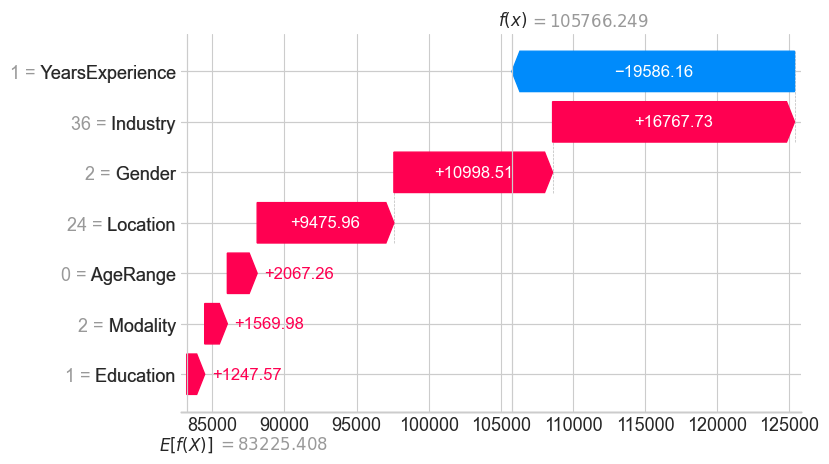

In [17]:
import shap

explainer = shap.Explainer(regressor, X)
shap_values = explainer(pd.DataFrame(x, columns=X.columns))
shap.plots.waterfall(shap_values[0])

## Save the Model

In [18]:
import pickle

data = {'model': regressor, 'le_age': le_age, 'le_industry': le_industry,
        'le_education': le_education, 'le_location': le_location,
        'le_modality': le_modality, 'le_gender': le_gender}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [19]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data['model']
le_age = data['le_age']
le_industry = data['le_industry']
le_education = data['le_education']
le_location = data['le_location']
le_modality = data['le_modality']
le_gender = data['le_gender']

In [20]:
y_pred = regressor_loaded.predict(x)
f'Expected salary: {y_pred[0]:.2f}$'

'Expected salary: 105766.25$'